In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import json
import os 
from sklearn.preprocessing import StandardScaler


## 資料前處理

In [2]:
label_mapping = {
    '11': '1-1','10': '1-2','9': '1-3','8': '1-4','7': '1-5','6': '1-6','5': '1-7','4': '1-8','3': '1-9','2': '1-10','1': '1-11',
    '12': '2-1','30': '2-11',
    '13': '3-1','29': '3-11',
    '14': '4-1','28': '4-11',
    '15': '5-1','27': '5-11',
    '16': '6-1','17': '6-2','18': '6-3','19': '6-4','20': '6-5','21': '6-6','22': '6-7','23': '6-8','24': '6-9','25': '6-10','26': '6-11',
    '49': '7-1','31': '7-11',
    '48': '8-1','32': '8-11',
    '47': '9-1','33': '9-11',
    '46': '10-1','34': '10-11',
    '45': '11-1','44': '11-2','43': '11-3','42': '11-4','41': '11-5','40': '11-6','39': '11-7','38': '11-8','37': '11-9','36': '11-10','35': '11-11'
}

In [3]:
# path_template = 'standalized_timestamp_allignment_{date}_rtt_logs.csv'
# path_template = 'timestamp_allignment_Balanced_{date}_rtt_logs.csv'

path = 'timestamp_allignment_Balanced_2024_12_14_rtt_logs.csv'
# path = 'All together\\14_21_27datacombine.csv'

# selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi','AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)'] 

# selected_columns = ['Label', 'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi',
#                     'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)'] 

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)']   

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP3_Distance (mm)','AP4_Distance (mm)',
#                     'AP1_StdDev (mm)','AP2_StdDev (mm)','AP3_StdDev (mm)','AP4_StdDev (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']  

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)',
#                     'AP1_Rssi','AP2_Rssi','AP3_Rssi','AP4_Rssi']

# selected_columns = ['Label', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)','AP3_Corrected Distance (mm)','AP4_Corrected Distance (mm)']

# selected_columns = ['Label', 'AP1_Distance (mm)','AP2_Distance (mm)','AP1_Rssi','AP2_Rssi', 'AP1_Corrected Distance (mm)','AP2_Corrected Distance (mm)']

In [4]:
ti = "4rssi"
date = "2024_12_14"

In [5]:
data = pd.read_csv(path, usecols=selected_columns)

test_size=0.2
val_size=0.1

target_column = 'Label'  # 替換成目標欄位名稱

# # 替換目標欄位的 label
# data[target_column] = data[target_column].astype(str).map(label_mapping)

# # 只對需要映射的值進行處理，保留已正確的值
# data[target_column] = data[target_column].apply(
#     lambda x: label_mapping[x] if x in label_mapping else x
# )

# # 確認是否有未映射的值
# unmapped_values = data[target_column][data[target_column].isna()].unique()
# if len(unmapped_values) > 0:
#     print("以下值未找到對應的映射：", unmapped_values)

# # 確認是否有未映射的值
# unmapped_values = data[target_column][~data[target_column].isin(label_mapping.values())].unique()
# if len(unmapped_values) > 0:
#     print("以下值未找到對應的映射：", unmapped_values)

data


,Label,AP1_Distance (mm),AP2_Distance (mm),AP3_Distance (mm),AP4_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-11,718.0,8178.0,4852.0,7432.0,-60.0,-68.0,-59.0,-61.0
1,1-11,639.0,8139.0,4911.0,6930.0,-62.0,-70.0,-59.0,-59.0
2,1-11,678.0,8139.0,4647.0,7471.0,-61.0,-69.0,-55.0,-62.0
3,1-11,718.0,8022.0,6219.0,7627.0,-62.0,-69.0,-55.0,-63.0
4,1-11,561.0,8335.0,4471.0,7471.0,-61.0,-70.0,-55.0,-62.0
...,...,...,...,...,...,...,...,...,...
19644,7-1,7280.0,4643.0,1307.0,9678.0,-64.0,-66.0,-58.0,-61.0
19645,7-1,6309.0,2270.0,844.0,8503.0,-67.0,-75.0,-59.0,-62.0
19646,7-1,6811.0,2475.0,1375.0,9883.0,-64.0,-66.0,-57.0,-61.0
19647,7-1,7837.0,2671.0,897.0,9511.0,-66.0,-65.0,-58.0,-59.0


### 資料切割

### 資料前處理


In [6]:
label_column = 'Label'

In [7]:
# 資料前處理 (一): 刪除前後n筆資料
n = 1
# 確保依據Label排序
data = data.sort_values(by=label_column).reset_index(drop=True)

# 建立一個空的 DataFrame 用於存放處理後的資料
processed_data = pd.DataFrame(columns=data.columns)

# 針對每個Label群組進行處理
for label, group in data.groupby(label_column):
    # 刪除前n筆和後n筆資料
    if len(group) > 2 * n:  # 確保群組資料足夠
        group = group.iloc[n:-n]
    else:
        group = pd.DataFrame()  # 若資料不足，刪除整個群組
    # 將處理後的群組資料加入
    processed_data = pd.concat([processed_data, group], ignore_index=True)

processed_data


C:\Users\吳定洋\AppData\Local\Temp\ipykernel_10032\2255483106.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  processed_data = pd.concat([processed_data, group], ignore_index=True)


,Label,AP1_Distance (mm),AP2_Distance (mm),AP3_Distance (mm),AP4_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,3877.0,6811.0,-811.0,11494.0,-51.0,-73.0,-55.0,-67.0
1,1-1,4155.0,6841.0,-850.0,11807.0,-63.0,-73.0,-56.0,-67.0
2,1-1,3682.0,6841.0,-733.0,11533.0,-53.0,-73.0,-55.0,-67.0
3,1-1,4311.0,6811.0,-743.0,11728.0,-58.0,-73.0,-56.0,-67.0
4,1-1,4155.0,6811.0,-889.0,12354.0,-61.0,-73.0,-53.0,-65.0
...,...,...,...,...,...,...,...,...,...
19546,9-11,1733.0,6255.0,5145.0,3555.0,-58.0,-69.0,-69.0,-57.0
19547,9-11,1694.0,7866.0,4500.0,2978.0,-57.0,-69.0,-65.0,-51.0
19548,9-11,1577.0,8100.0,4998.0,2979.0,-58.0,-70.0,-65.0,-52.0
19549,9-11,1850.0,8061.0,4461.0,2861.0,-57.0,-69.0,-64.0,-51.0


In [8]:
# Calculate the number of rows with NaN values
nan_rows = processed_data.isnull().any(axis=1).sum()

# Print the result
print(f"Number of rows with NaN values: {nan_rows}")

# 找出包含 NaN 的列
rows_with_nan = processed_data[processed_data.isnull().any(axis=1)]

# 印出這些列
print("Rows with NaN values:")
print(rows_with_nan)

Number of rows with NaN values: 1040
Rows with NaN values:
      Label  AP1_Distance (mm)  AP2_Distance (mm)  AP3_Distance (mm)  \
5       1-1             4116.0             6811.0                NaN   
43      1-1             4311.0             6958.0                NaN   
65      1-1             4116.0             6665.0                NaN   
68      1-1                NaN                NaN             -889.0   
79      1-1                NaN                NaN            -1028.0   
...     ...                ...                ...                ...   
19399  9-11                NaN             5639.0                NaN   
19418  9-11             1538.0             5639.0                NaN   
19440  9-11                NaN                NaN             4793.0   
19500  9-11                NaN                NaN             4764.0   
19526  9-11             1577.0                NaN             4081.0   

       AP4_Distance (mm)  AP1_Rssi  AP2_Rssi  AP3_Rssi  AP4_Rssi  
5        

### 選一個做

In [9]:
data_imputed = processed_data.groupby(label_column).apply(
    lambda group: group.fillna(group.mean())
).reset_index()
data_imputed


,Label,level_1,AP1_Distance (mm),AP2_Distance (mm),AP3_Distance (mm),AP4_Distance (mm),AP1_Rssi,AP2_Rssi,AP3_Rssi,AP4_Rssi
0,1-1,0,3877.0,6811.0,-811.0,11494.0,-51.0,-73.0,-55.0,-67.0
1,1-1,1,4155.0,6841.0,-850.0,11807.0,-63.0,-73.0,-56.0,-67.0
2,1-1,2,3682.0,6841.0,-733.0,11533.0,-53.0,-73.0,-55.0,-67.0
3,1-1,3,4311.0,6811.0,-743.0,11728.0,-58.0,-73.0,-56.0,-67.0
4,1-1,4,4155.0,6811.0,-889.0,12354.0,-61.0,-73.0,-53.0,-65.0
...,...,...,...,...,...,...,...,...,...,...
19546,9-11,19546,1733.0,6255.0,5145.0,3555.0,-58.0,-69.0,-69.0,-57.0
19547,9-11,19547,1694.0,7866.0,4500.0,2978.0,-57.0,-69.0,-65.0,-51.0
19548,9-11,19548,1577.0,8100.0,4998.0,2979.0,-58.0,-70.0,-65.0,-52.0
19549,9-11,19549,1850.0,8061.0,4461.0,2861.0,-57.0,-69.0,-64.0,-51.0


## 選擇使用 model

# K-fold

### KNN & evaluation:accuracy


In [10]:
label_to_coordinates = {
    "1-1": (0, 0), "1-2": (0.6, 0), "1-3": (1.2, 0), "1-4": (1.8, 0), "1-5": (2.4, 0), "1-6": (3.0, 0),"1-7": (3.6, 0), "1-8": (4.2, 0), "1-9": (4.8, 0), "1-10": (5.4, 0), "1-11": (6.0, 0),
    "2-1": (0, 0.6), "2-11": (6.0, 0.6),
    "3-1": (0, 1.2), "3-11": (6.0, 1.2),
    "4-1": (0, 1.8), "4-11": (6.0, 1.8),
    "5-1": (0, 2.4), "5-11": (6.0, 2.4),
    "6-1": (0, 3.0), "6-2": (0.6, 3.0), "6-3": (1.2, 3.0), "6-4": (1.8, 3.0), "6-5": (2.4, 3.0),"6-6": (3.0, 3.0), "6-7": (3.6, 3.0), "6-8": (4.2, 3.0), "6-9": (4.8, 3.0), "6-10": (5.4, 3.0), "6-11": (6.0, 3.0),
    "7-1": (0, 3.6), "7-11": (6.0, 3.6),
    "8-1": (0, 4.2), "8-11": (6.0, 4.2),
    "9-1": (0, 4.8), "9-11": (6.0, 4.8),
    "10-1": (0, 5.4), "10-11": (6.0, 5.4),
    "11-1": (0, 6.0), "11-2": (0.6, 6.0), "11-3": (1.2, 6.0), "11-4": (1.8, 6.0), "11-5": (2.4, 6.0),"11-6": (3.0, 6.0), "11-7": (3.6, 6.0), "11-8": (4.2, 6.0), "11-9": (4.8, 6.0), "11-10": (5.4, 6.0), "11-11": (6.0, 6.0)
}

In [11]:
k = 5
n_neighbors = 5
# report files
file_path = 'Final use\\KNN\\knn_report_{date}.txt'

In [12]:
# Step 3: 修改為支持 K-fold 的 KNN 評估並計算平均混淆矩陣
kf = KFold(n_splits=k, shuffle=True, random_state=42)
overall_accuracy = []
fold_reports = []

overall_mde = []  # 用於儲存每個 fold 的平均 MDE
mde_report = {}


# 初始化儲存所有 folds 的真實值和預測值
all_y_test = []
all_y_test_pred = []

# 把label部分拿掉
X = data_imputed.drop(columns=['level_1','Label'])
y = data_imputed[target_column]

print("X type")
print(X.dtypes)
print("y type")
print(y.dtypes)

# 使用 Z-score 標準化
scaler = StandardScaler()
selected_columns.remove('Label')
X[selected_columns] = scaler.fit_transform(X[selected_columns])
X_scaled = scaler.fit_transform(X[selected_columns])

print(X_scaled[0])

X type
AP1_Distance (mm)    float64
AP2_Distance (mm)    float64
AP3_Distance (mm)    float64
AP4_Distance (mm)    float64
AP1_Rssi             float64
AP2_Rssi             float64
AP3_Rssi             float64
AP4_Rssi             float64
dtype: object
y type
object
[ 2.00996662 -1.05985233  0.41595499 -1.6741561   0.46727709  0.54172408
 -1.44422436  1.76386251]


y_train_numeric unique values: [11  2  1 10  9  8  7  6  5  4  3 46 34 45 36 35 44 43 42 41 40 39 38 37
 12 30 13 29 14 28 15 27 16 25 26 17 18 19 20 21 22 23 24 49 31 48 32 47
 33]
reverse_label_mapping in KNN: {'1-1': 11, '1-2': 10, '1-3': 9, '1-4': 8, '1-5': 7, '1-6': 6, '1-7': 5, '1-8': 4, '1-9': 3, '1-10': 2, '1-11': 1, '2-1': 12, '2-11': 30, '3-1': 13, '3-11': 29, '4-1': 14, '4-11': 28, '5-1': 15, '5-11': 27, '6-1': 16, '6-2': 17, '6-3': 18, '6-4': 19, '6-5': 20, '6-6': 21, '6-7': 22, '6-8': 23, '6-9': 24, '6-10': 25, '6-11': 26, '7-1': 49, '7-11': 31, '8-1': 48, '8-11': 32, '9-1': 47, '9-11': 33, '10-1': 46, '10-11': 34, '11-1': 45, '11-2': 44, '11-3': 43, '11-4': 42, '11-5': 41, '11-6': 40, '11-7': 39, '11-8': 38, '11-9': 37, '11-10': 36, '11-11': 35}
Fold 1 - Accuracy: 0.9931
Fold 1 - MDE: 0.0088
y_train_numeric unique values: [11  2  1 10  9  8  7  6  5  4  3 46 34 45 36 35 44 43 42 41 40 39 38 37
 12 30 13 29 14 28 15 27 16 25 26 17 18 19 20 21 22 23 24 49 31 48 32 47
 33]
r

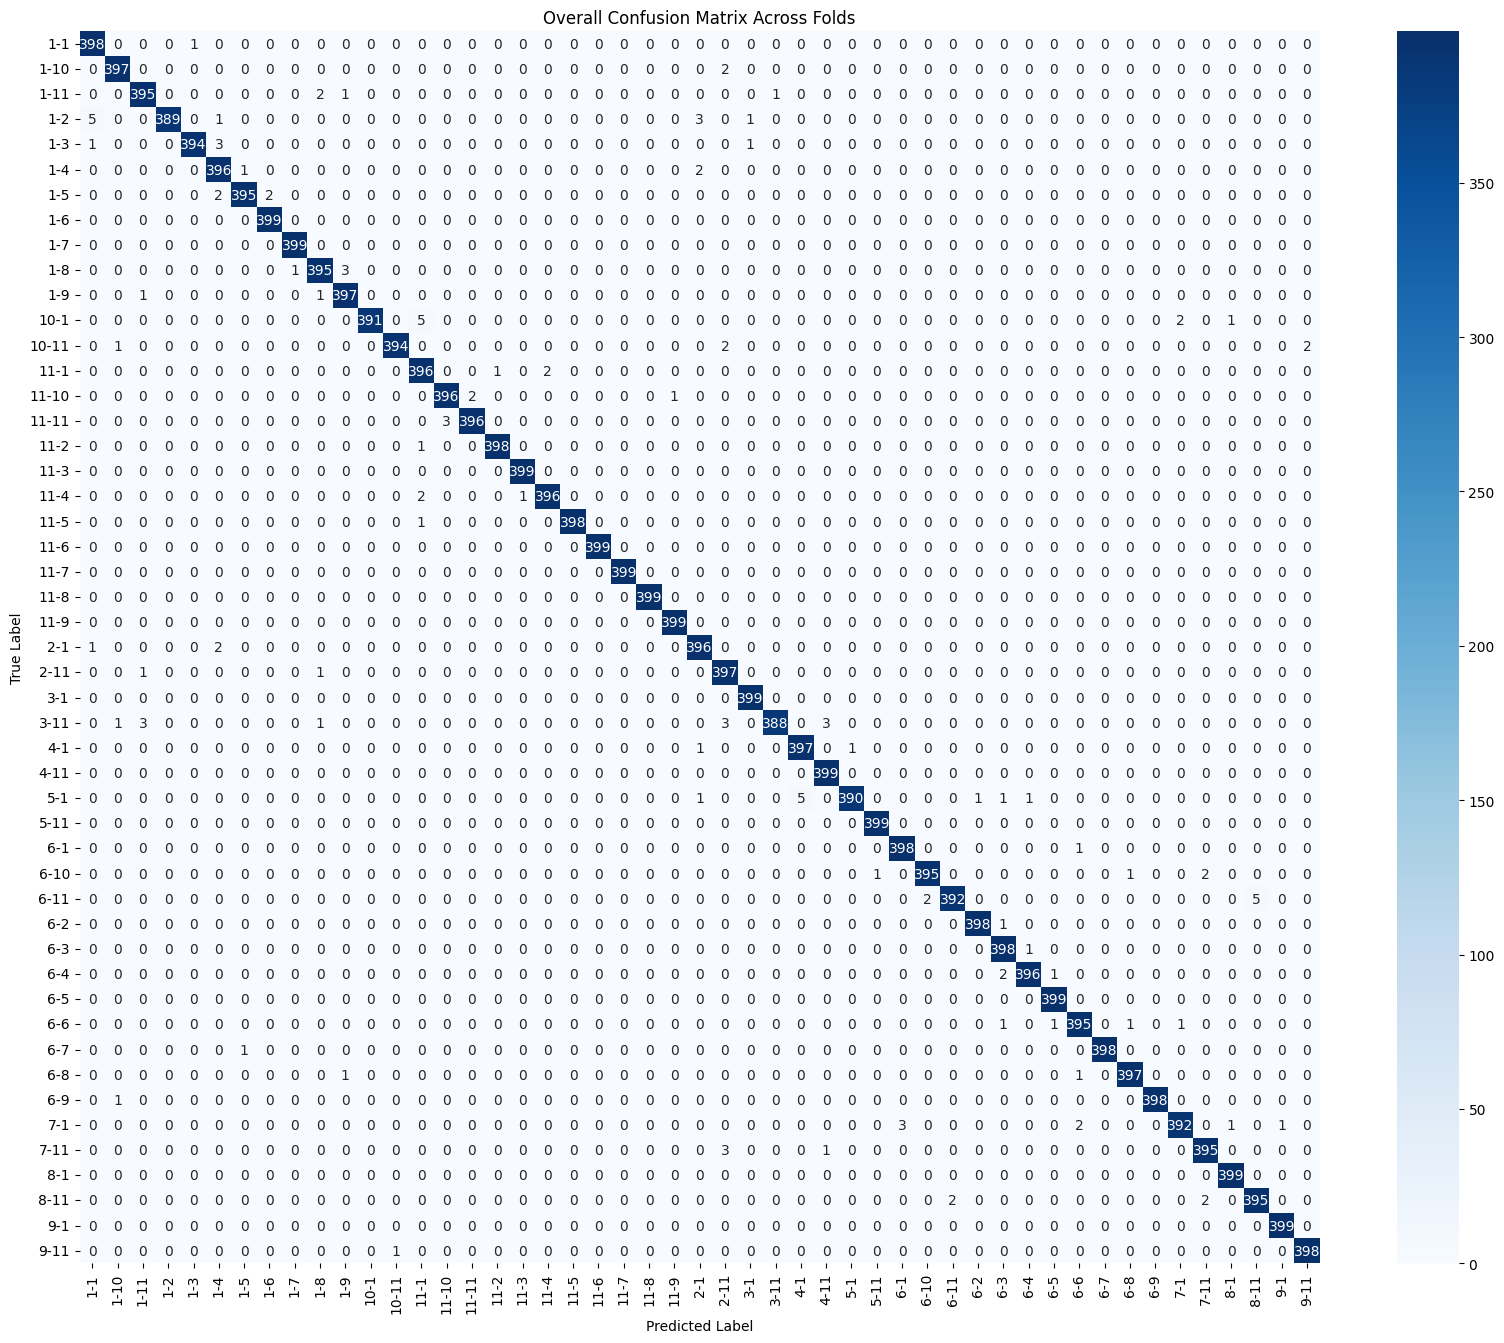

MDE report saved to: mde_report_2024_12_14.json
Classification report saved to: accuracy_report_2024_12_14.txt

Average Accuracy across 5 folds: 0.9934

Average Classification Report per Label:
Label 1-1 - Precision: 0.9826, Recall: 0.9975, F1-score: 0.9899
Label 1-10 - Precision: 0.9920, Recall: 0.9954, F1-score: 0.9937
Label 1-11 - Precision: 0.9873, Recall: 0.9901, F1-score: 0.9886
Label 1-2 - Precision: 1.0000, Recall: 0.9751, F1-score: 0.9873
Label 1-3 - Precision: 0.9968, Recall: 0.9877, F1-score: 0.9921
Label 1-4 - Precision: 0.9803, Recall: 0.9930, F1-score: 0.9865
Label 1-5 - Precision: 0.9958, Recall: 0.9914, F1-score: 0.9936
Label 1-6 - Precision: 0.9951, Recall: 1.0000, F1-score: 0.9975
Label 1-7 - Precision: 0.9974, Recall: 1.0000, F1-score: 0.9987
Label 1-8 - Precision: 0.9874, Recall: 0.9900, F1-score: 0.9886
Label 1-9 - Precision: 0.9878, Recall: 0.9951, F1-score: 0.9914
Label 10-1 - Precision: 1.0000, Recall: 0.9801, F1-score: 0.9899
Label 10-11 - Precision: 0.9978, Re

In [13]:
# #開始k fold
fold_index = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # 建立反向映射字典
    reverse_label_mapping = {v: int(k) for k, v in label_mapping.items()}

    # 將 y_train 的字串標籤轉換為數值
    y_train_numeric = y_train.map(reverse_label_mapping)

    print("y_train_numeric unique values:", y_train_numeric.unique())
    print("reverse_label_mapping in KNN:", reverse_label_mapping)


    # print(X_train.head())

    
    # 建立 KNN 模型
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn.fit(X_train, y_train_numeric)
    
    # 預測
    y_test_pred_numeric  = knn.predict(X_test)


    # 將數值標籤轉換回字串標籤
    y_test_pred_labels = [label_mapping[str(num)] for num in y_test_pred_numeric]   

    # 儲存當前 fold 的 y_test 和 y_test_pred
    all_y_test.extend(y_test)  # 累積所有真實值
    all_y_test_pred.extend(y_test_pred_labels)  # 累積所有預測值

    
    # 計算整體準確率
    accuracy = accuracy_score(y_test, y_test_pred_labels)
    overall_accuracy.append(accuracy)

    # MDE
     # Calculate MDE metrics
    y_test_pred_coordinates = np.array([label_to_coordinates[label] for label in y_test_pred_labels])
    y_test_coordinates = np.array([label_to_coordinates[label] for label in y_test])

    distances = np.linalg.norm(y_test_pred_coordinates - y_test_coordinates, axis=1)
    
    fold_mde = np.mean(distances)  # 計算當前 fold 的平均 MDE
    overall_mde.append(fold_mde)  # 儲存當前 fold 的平均 MDE
    
    # 累積 MDE 數據
    for true_label, distance in zip(y_test, distances):
        if true_label not in mde_report:
            mde_report[true_label] = []
        mde_report[true_label].append(distance)  # 累積所有 fold 的距離數據



    # 計算分類報告
    report = classification_report(
        y_test, y_test_pred_labels,
        target_names=[str(label) for label in np.unique(y)],
        zero_division=0,
        output_dict=True  # 以字典形式輸出，方便進一步分析
    )
    fold_reports.append(report)

    print(f"Fold {fold_index} - Accuracy: {accuracy:.4f}")
    print(f"Fold {fold_index} - MDE: {fold_mde:.4f}")

    fold_index += 1
    



unique_labels = sorted(np.unique(all_y_test))  # 確保標籤排序一致
# 在所有 folds 結束後，繪製總體混淆矩陣
all_cm = confusion_matrix(all_y_test, all_y_test_pred, labels=np.unique(y))

plt.figure(figsize=(20, 16))
sns.heatmap(all_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Overall Confusion Matrix Across Folds")
plt.savefig("Overall_Confusion_Matrix.png")
plt.show()

# # 計算每個標籤的平均 MDE
# avg_mde_report = {label: np.mean(distances) for label, distances in mde_report.items()}

# 計算每個標籤的平均 MDE
avg_mde_report = {label: {"mde": np.mean(distances), "count": len(distances)} for label, distances in mde_report.items()}


# 儲存到 JSON 檔案
file_path = f"mde_report_{date}.json"
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

with open(file_path, "w") as f:
    json.dump(avg_mde_report, f, indent=4)
print(f"MDE report saved to: {file_path}")

# 計算每個類別的平均性能
avg_report = {}
for label in np.unique(y):
    label = str(label)
    avg_report[label] = {
        "precision": np.mean([report[label]["precision"] for report in fold_reports if label in report]),
        "recall": np.mean([report[label]["recall"] for report in fold_reports if label in report]),
        "f1-score": np.mean([report[label]["f1-score"] for report in fold_reports if label in report])
    }


file_path = f'accuracy_report_{date}.txt'
# Check if the file exists, and create it if it doesn't
if not os.path.exists(file_path):
    with open(file_path, 'w') as f:
        f.write("")  # Create an empty file

# Write the classification report to the file
with open(file_path, "w") as f:
    json.dump(report, f, indent=4)

print(f"Classification report saved to: {file_path}")


# 打印所有 fold 的平均 Accuracy 和 MDE
avg_accuracy = np.mean(overall_accuracy)
avg_mde = np.mean(overall_mde)
print(f"\nAverage Accuracy across {k} folds: {avg_accuracy:.4f}")
print("\nAverage Classification Report per Label:")
for label, metrics in avg_report.items():
    print(f"Label {label} - Precision: {metrics['precision']:.4f}, Recall: {metrics['recall']:.4f}, F1-score: {metrics['f1-score']:.4f}")
print(f"Average MDE across {k} folds: {avg_mde:.4f}")


## Accuracy 畫圖

{'1-1': {'precision': 0.9878048780487805, 'recall': 1.0, 'f1-score': 0.9938650306748467, 'support': 81.0}, '1-10': {'precision': 0.9868421052631579, 'recall': 1.0, 'f1-score': 0.9933774834437086, 'support': 75.0}, '1-11': {'precision': 0.9876543209876543, 'recall': 1.0, 'f1-score': 0.9937888198757764, 'support': 80.0}, '1-2': {'precision': 1.0, 'recall': 0.9565217391304348, 'f1-score': 0.9777777777777777, 'support': 69.0}, '1-3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 94.0}, '1-4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 81.0}, '1-5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 80.0}, '1-6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 67.0}, '1-7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 74.0}, '1-8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 84.0}, '1-9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 65.0}, '10-1': {'precision': 1.0, 'recall': 0.97

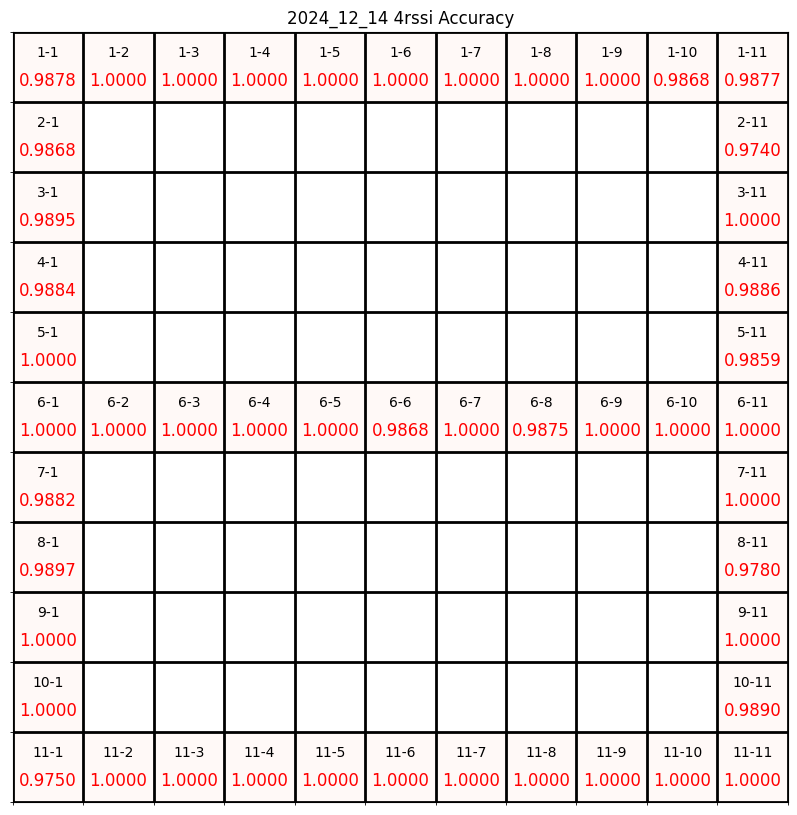

In [14]:
Title = f"{date} {ti} Accuracy"
file_path = f'accuracy_report_{date}.txt'

# Load the figure.txt JSON file
with open(file_path) as file:
    data = json.load(file)

print(data)

# Filter out keys that are not class labels (e.g., "accuracy", "macro avg")
filtered_data = {k: v for k, v in data.items() if '-' in k}

print(filtered_data)

# Extract precision values without mapping
precision_values = {k: v['precision'] for k, v in filtered_data.items()}

precision_values

# Grid layout (11x11)
rows, cols = 11, 11
grid = np.full((rows, cols), np.nan)  # Initialize grid with NaN
labels = np.empty((rows, cols), dtype=object)  # Initialize grid for labels

# Populate the grid with precision values and labels (reverse row index for correct plotting)
for key, value in precision_values.items():
    if '-' in key:
        r, c = map(int, key.split('-'))
        grid[rows - r, c - 1] = value  # Reverse rows for top-left (1-1) to bottom-left (11-1)
        labels[rows - r, c - 1] = key

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.Reds_r  # Color map

# 設定自定義顏色範圍
vmin = 0  # 最小值對應的顏色
vmax = np.nanmax(grid) * 0.5  # 最大值對應的顏色 (縮小範圍讓顏色對比更明顯)

log_grid = np.log(grid + 1e-6)  # 避免取 log(0)

# Draw grid with precision values and labels
for i in range(rows):
    for j in range(cols):
        value = grid[i, j]
        label = labels[i, j]
        if not np.isnan(value):
            ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
            ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='red', fontsize=12)
        rect_color = cmap(value / np.nanmax(log_grid)) if not np.isnan(value) else 'white'
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))


# Format grid
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.title(Title)
plt.show()

##  MDE 畫圖

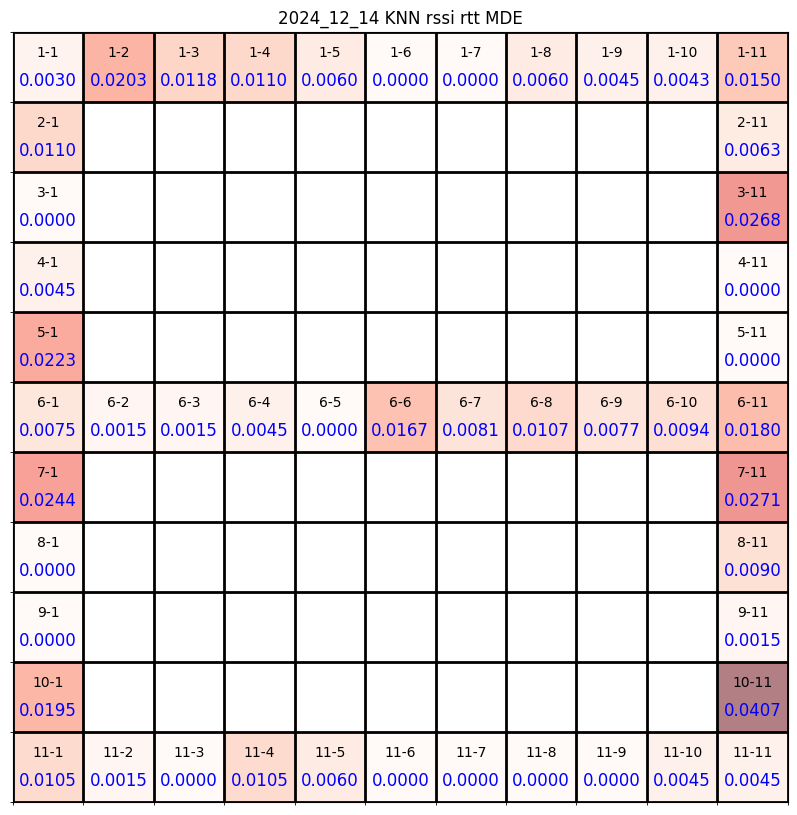

In [15]:
Title = f"{date} {ti} MDE"
Title = "2024_12_14 KNN rssi rtt MDE"
file_path = f'mde_report_{date}.json'

# 載入 JSON 報告
with open(file_path) as file:
    mde_data = json.load(file)

# 將 MDE 填入網格
rows, cols = 11, 11
grid = np.full((rows, cols), np.nan)  # 初始化網格
labels = np.empty((rows, cols), dtype=object)  # 初始化標籤

# 填充網格數據
for key, value in mde_data.items():
    if '-' in key:
        r, c = map(int, key.split('-'))
        grid[rows - r, c - 1] = value["mde"]  # 反轉行索引以正確對應圖表
        labels[rows - r, c - 1] = key

# 繪製圖表
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.Reds  # 顏色映射

# 畫出每個網格
for i in range(rows):
    for j in range(cols):
        value = grid[i, j]
        label = labels[i, j]
        if not np.isnan(value):
            ax.text(j, i + 0.2, f'{label}', ha='center', va='center', color='black', fontsize=10)
            ax.text(j, i - 0.2, f'{value:.4f}', ha='center', va='center', color='blue', fontsize=12)
        rect_color = cmap(value / np.nanmax(grid)) if not np.isnan(value) else 'white'
        ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color, alpha=0.5))

# 格式化圖表
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(-0.5, rows - 0.5)
ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.title(Title)
plt.show()


In [16]:
# # Calculate the number of rows with NaN values
# nan_rows = data_imputed.isnull().any(axis=1).sum()

# # Print the result
# print(f"Number of rows with NaN values: {nan_rows}")

# # 找出包含 NaN 的列
# rows_with_nan = data_imputed[data_imputed.isnull().any(axis=1)]

# # 印出這些列
# print("Rows with NaN values:")
# print(rows_with_nan)


In [17]:
# # 刪除有 NAN 的 row
# data_imputed = processed_data.dropna()
# data_imputed

In [18]:
# # 線性插值法填補數值型欄位的 NaN 值
# data_imputed = processed_data.interpolate()
# data_imputed

In [19]:
# # 確定數值型與類別型欄位
# numeric_columns = processed_data.select_dtypes(include=['float', 'int']).columns
# non_numeric_columns = processed_data.select_dtypes(exclude=['float', 'int']).columns

# # 取出數值型資料
# numeric_data = processed_data[numeric_columns]

# # 使用 KNNImputer 填補數值型缺失值
# k = 5
# imputer = KNNImputer(n_neighbors=k)
# numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_columns)

# # 填補類別型資料的缺失值（使用 mode）
# categorical_data = processed_data[non_numeric_columns].copy()
# for col in categorical_data.columns:
#     if categorical_data[col].isnull().any():
#         categorical_data[col].fillna(categorical_data[col].mode()[0], inplace=True)

# # 合併數值型與類別型資料
# data_imputed = pd.concat([numeric_data_imputed, categorical_data.reset_index(drop=True)], axis=1)

# # 確認結果
# data_imputed